In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

IMPORTING CSV FILE

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#converting categorial into numerical
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)

In [7]:
df_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [8]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


CHECKING NULL VALUES

In [9]:
df_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

VISUALISING NULL VALUES GRAPHICALLY

<AxesSubplot:>

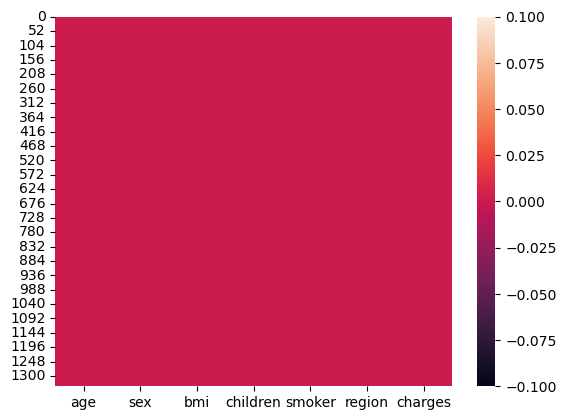

In [10]:
sns.heatmap(df_copy.isnull())

CORRELATION OF DATA

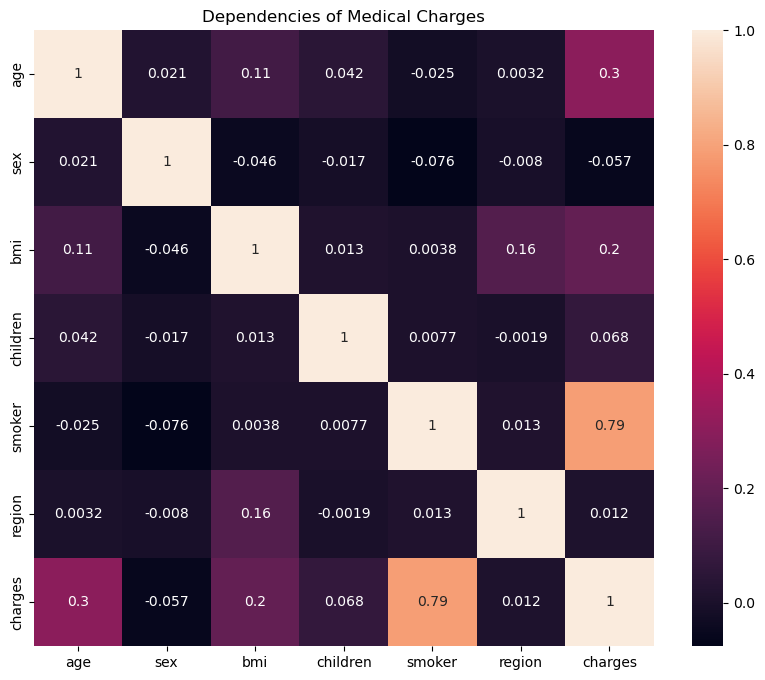

In [11]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.title("Dependencies of Medical Charges")

plt.show()

In [12]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


# DATA VISUALIZATION

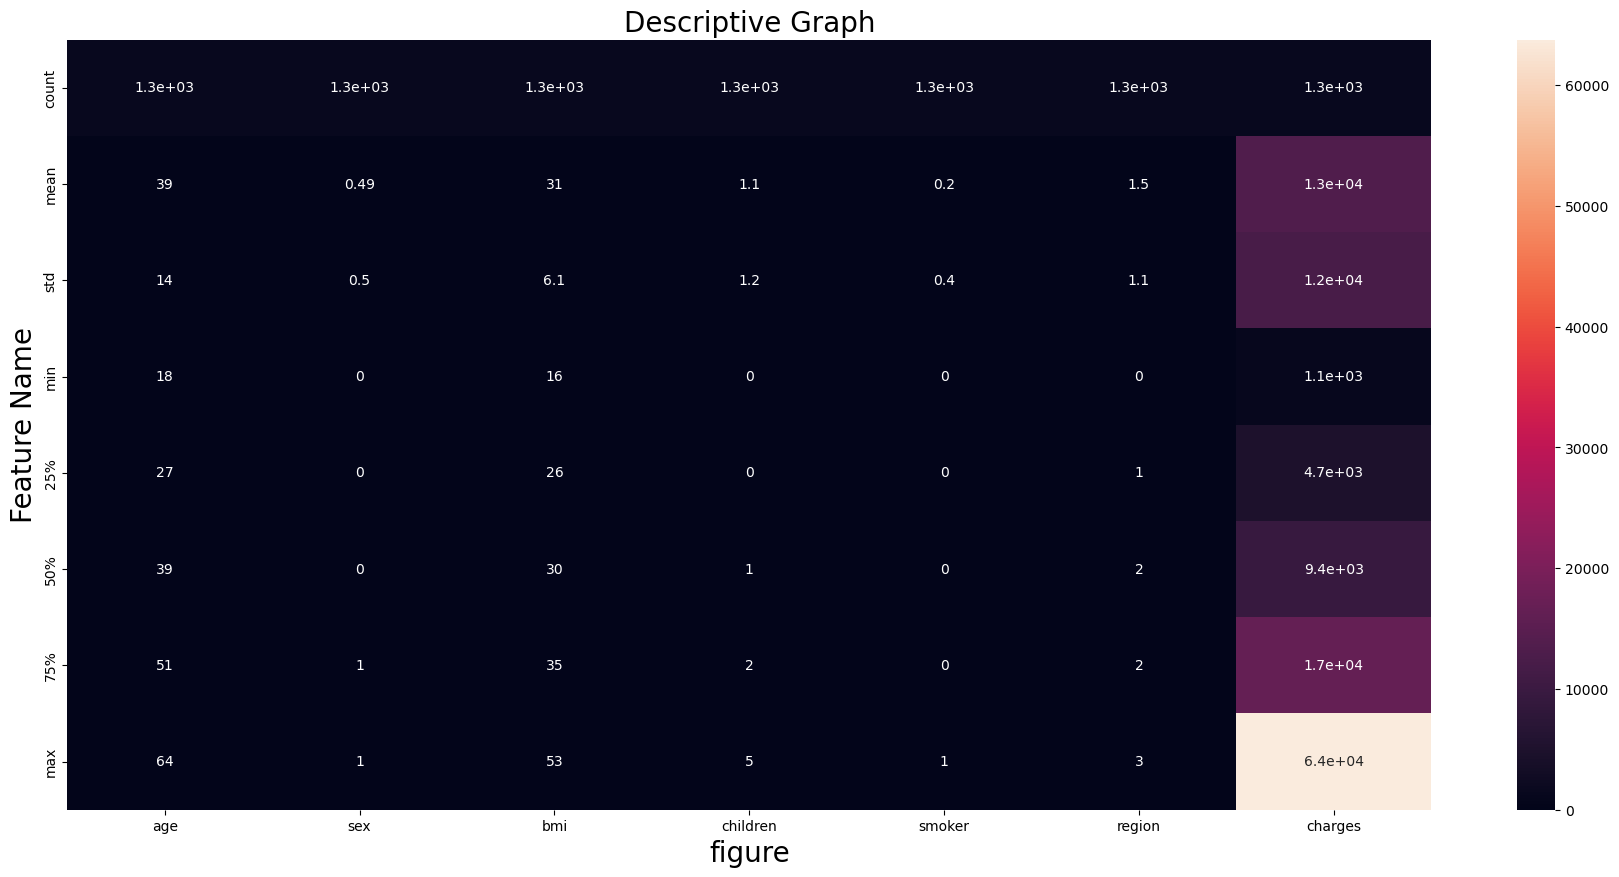

In [13]:
#Data Visualization
plt.figure(figsize=(22,10))
sns.heatmap(df_copy.describe(),annot=True,color="blue")
plt.xlabel("figure",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

COMPARING DIFFERENT DATA SET GRAPHICALLY

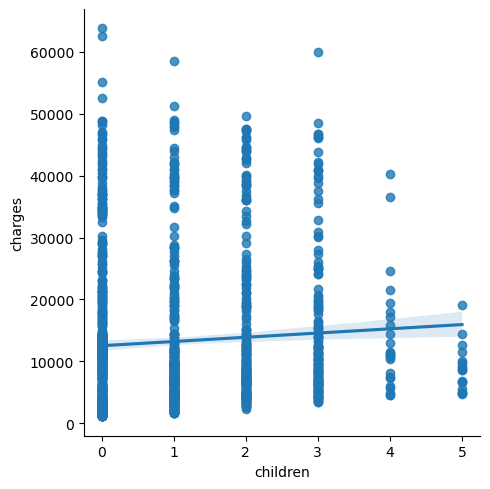

In [14]:
sns.lmplot(x="children",y="charges",data=df_copy)

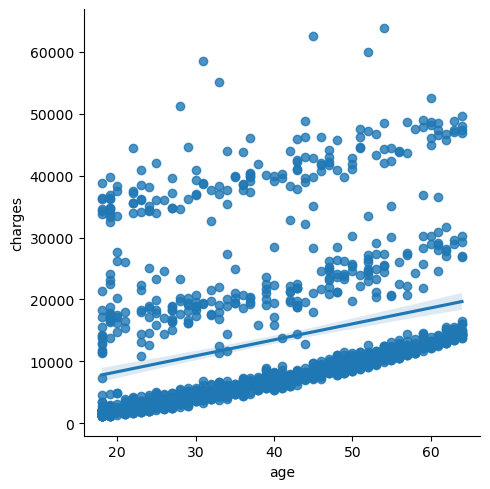

In [15]:
sns.lmplot(x="age",y="charges",data=df_copy)

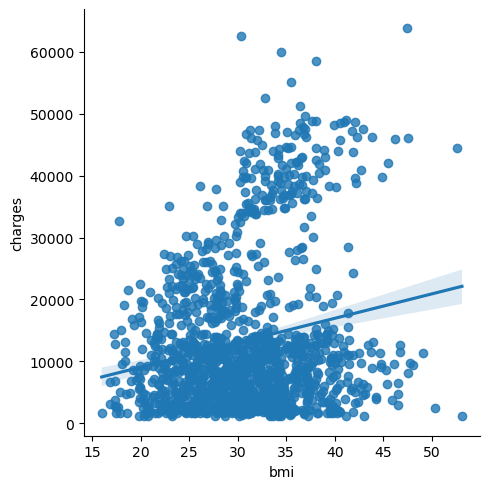

In [16]:
sns.lmplot(x="bmi",y="charges",data=df_copy)

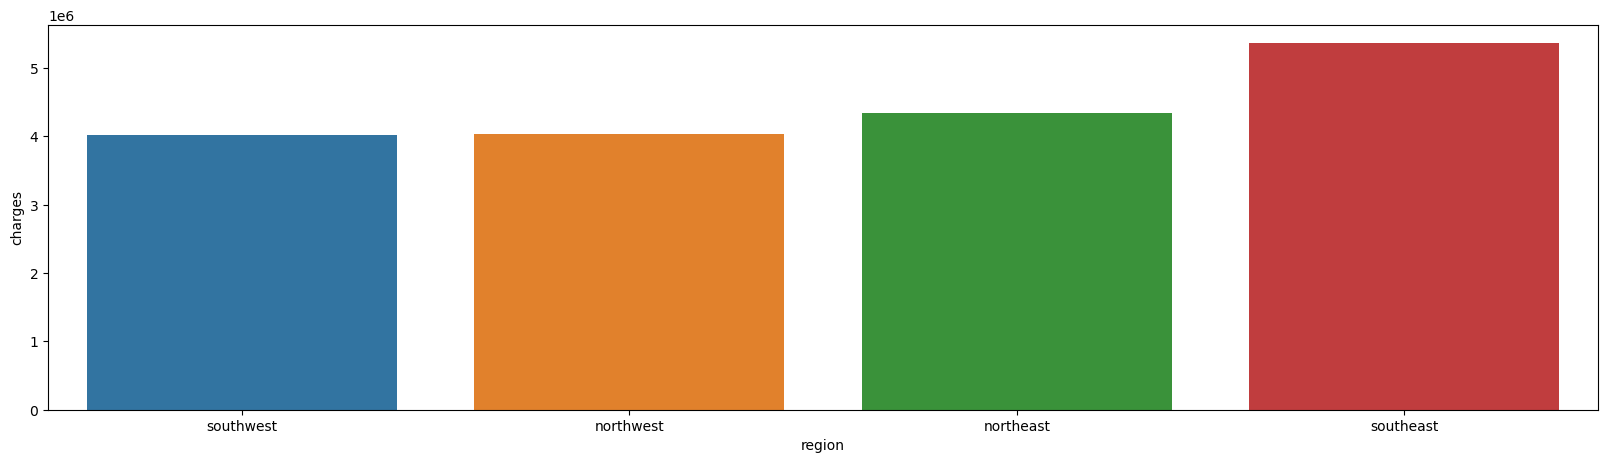

In [17]:
charges = df_copy['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

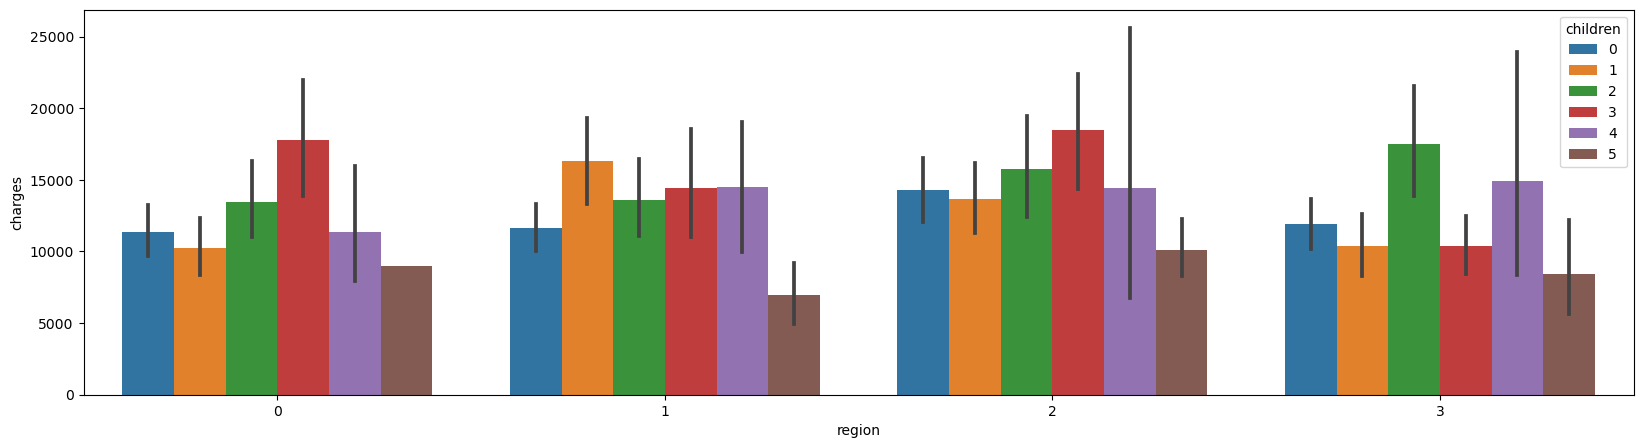

In [18]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df_copy)

SCATTER PLOT

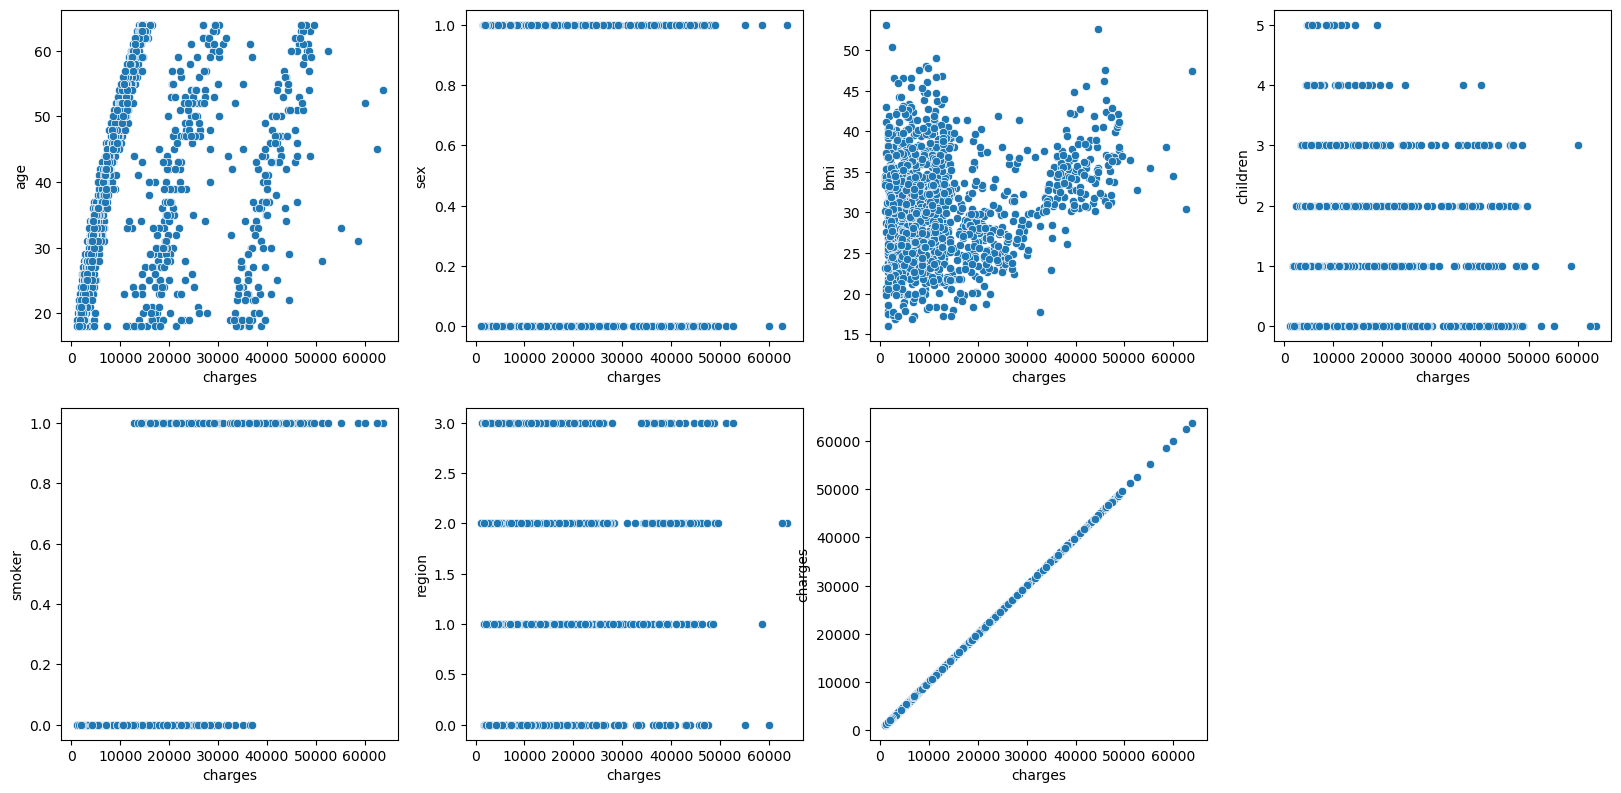

In [19]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.scatterplot(x="charges",y=i,data=df_copy)
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()

LINEPLOT

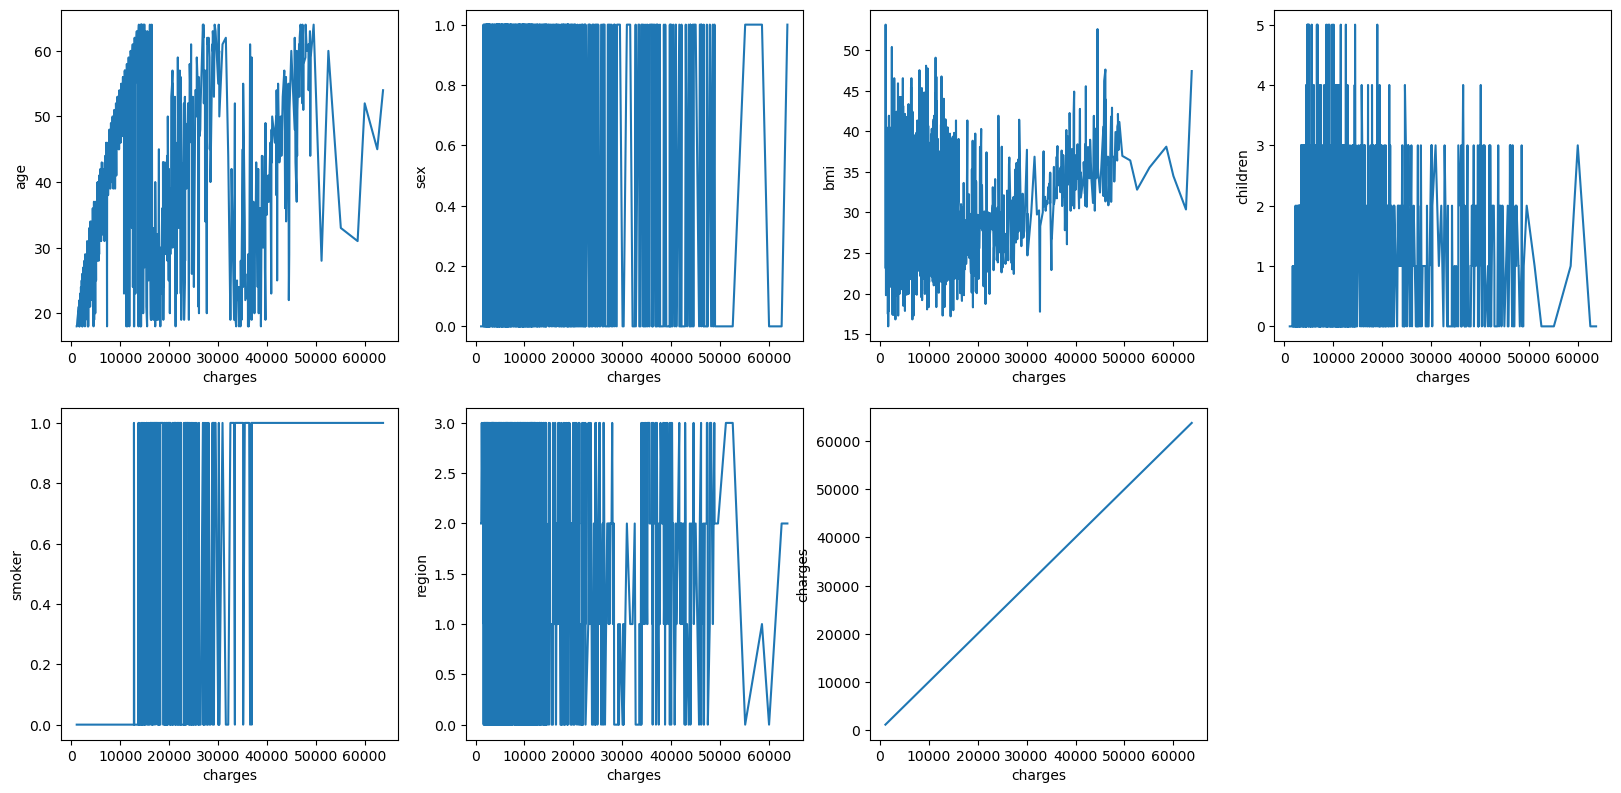

In [20]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.lineplot(x="charges",y=i,data=df_copy)
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()

HISTPLOT

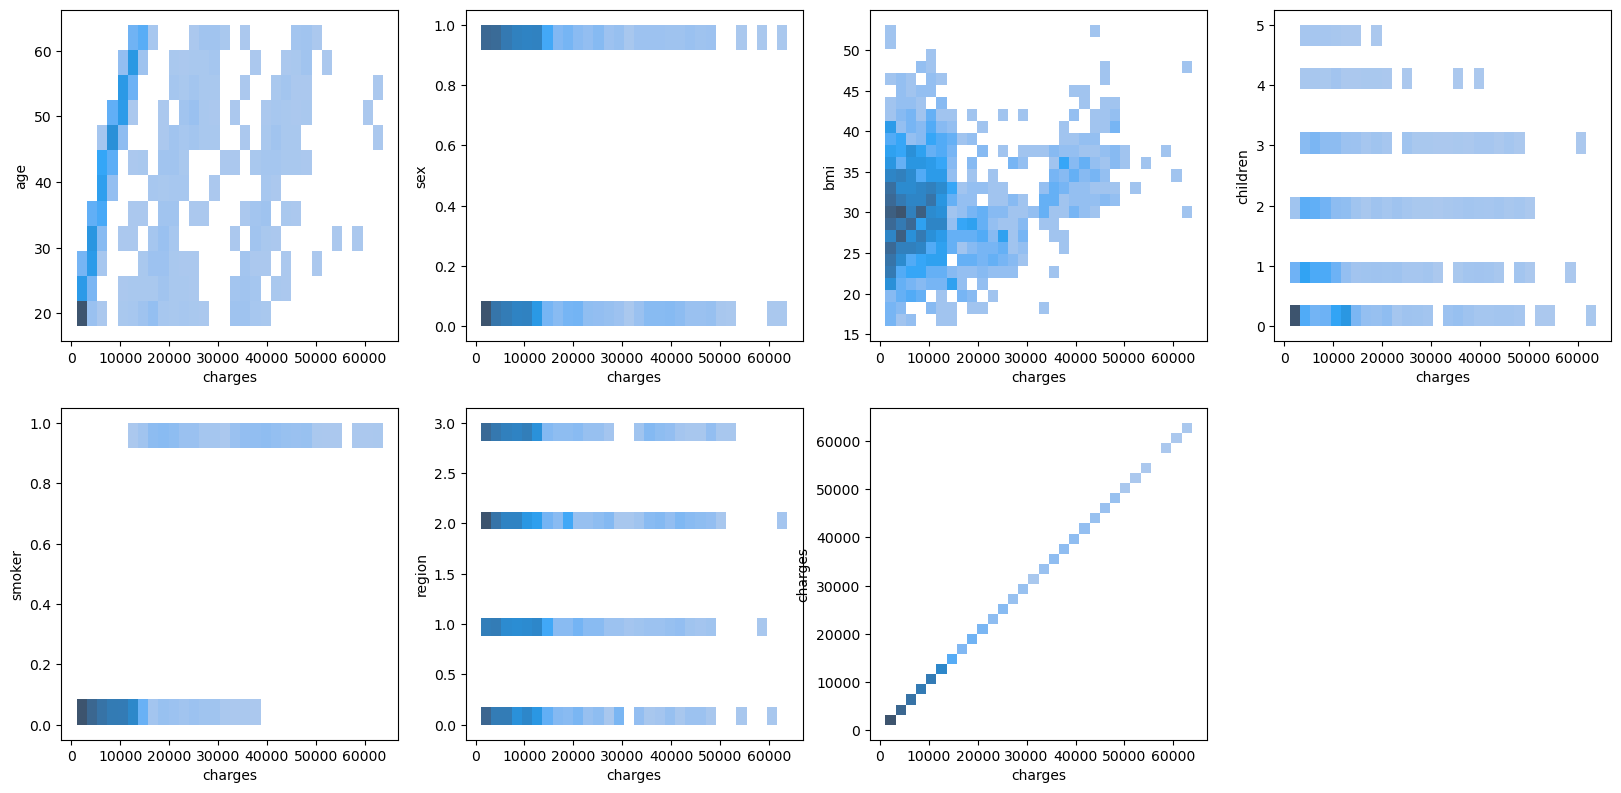

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.histplot(x="charges",y=i,data=df_copy)
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
plt.show()

PAIR PLOT OF DATA

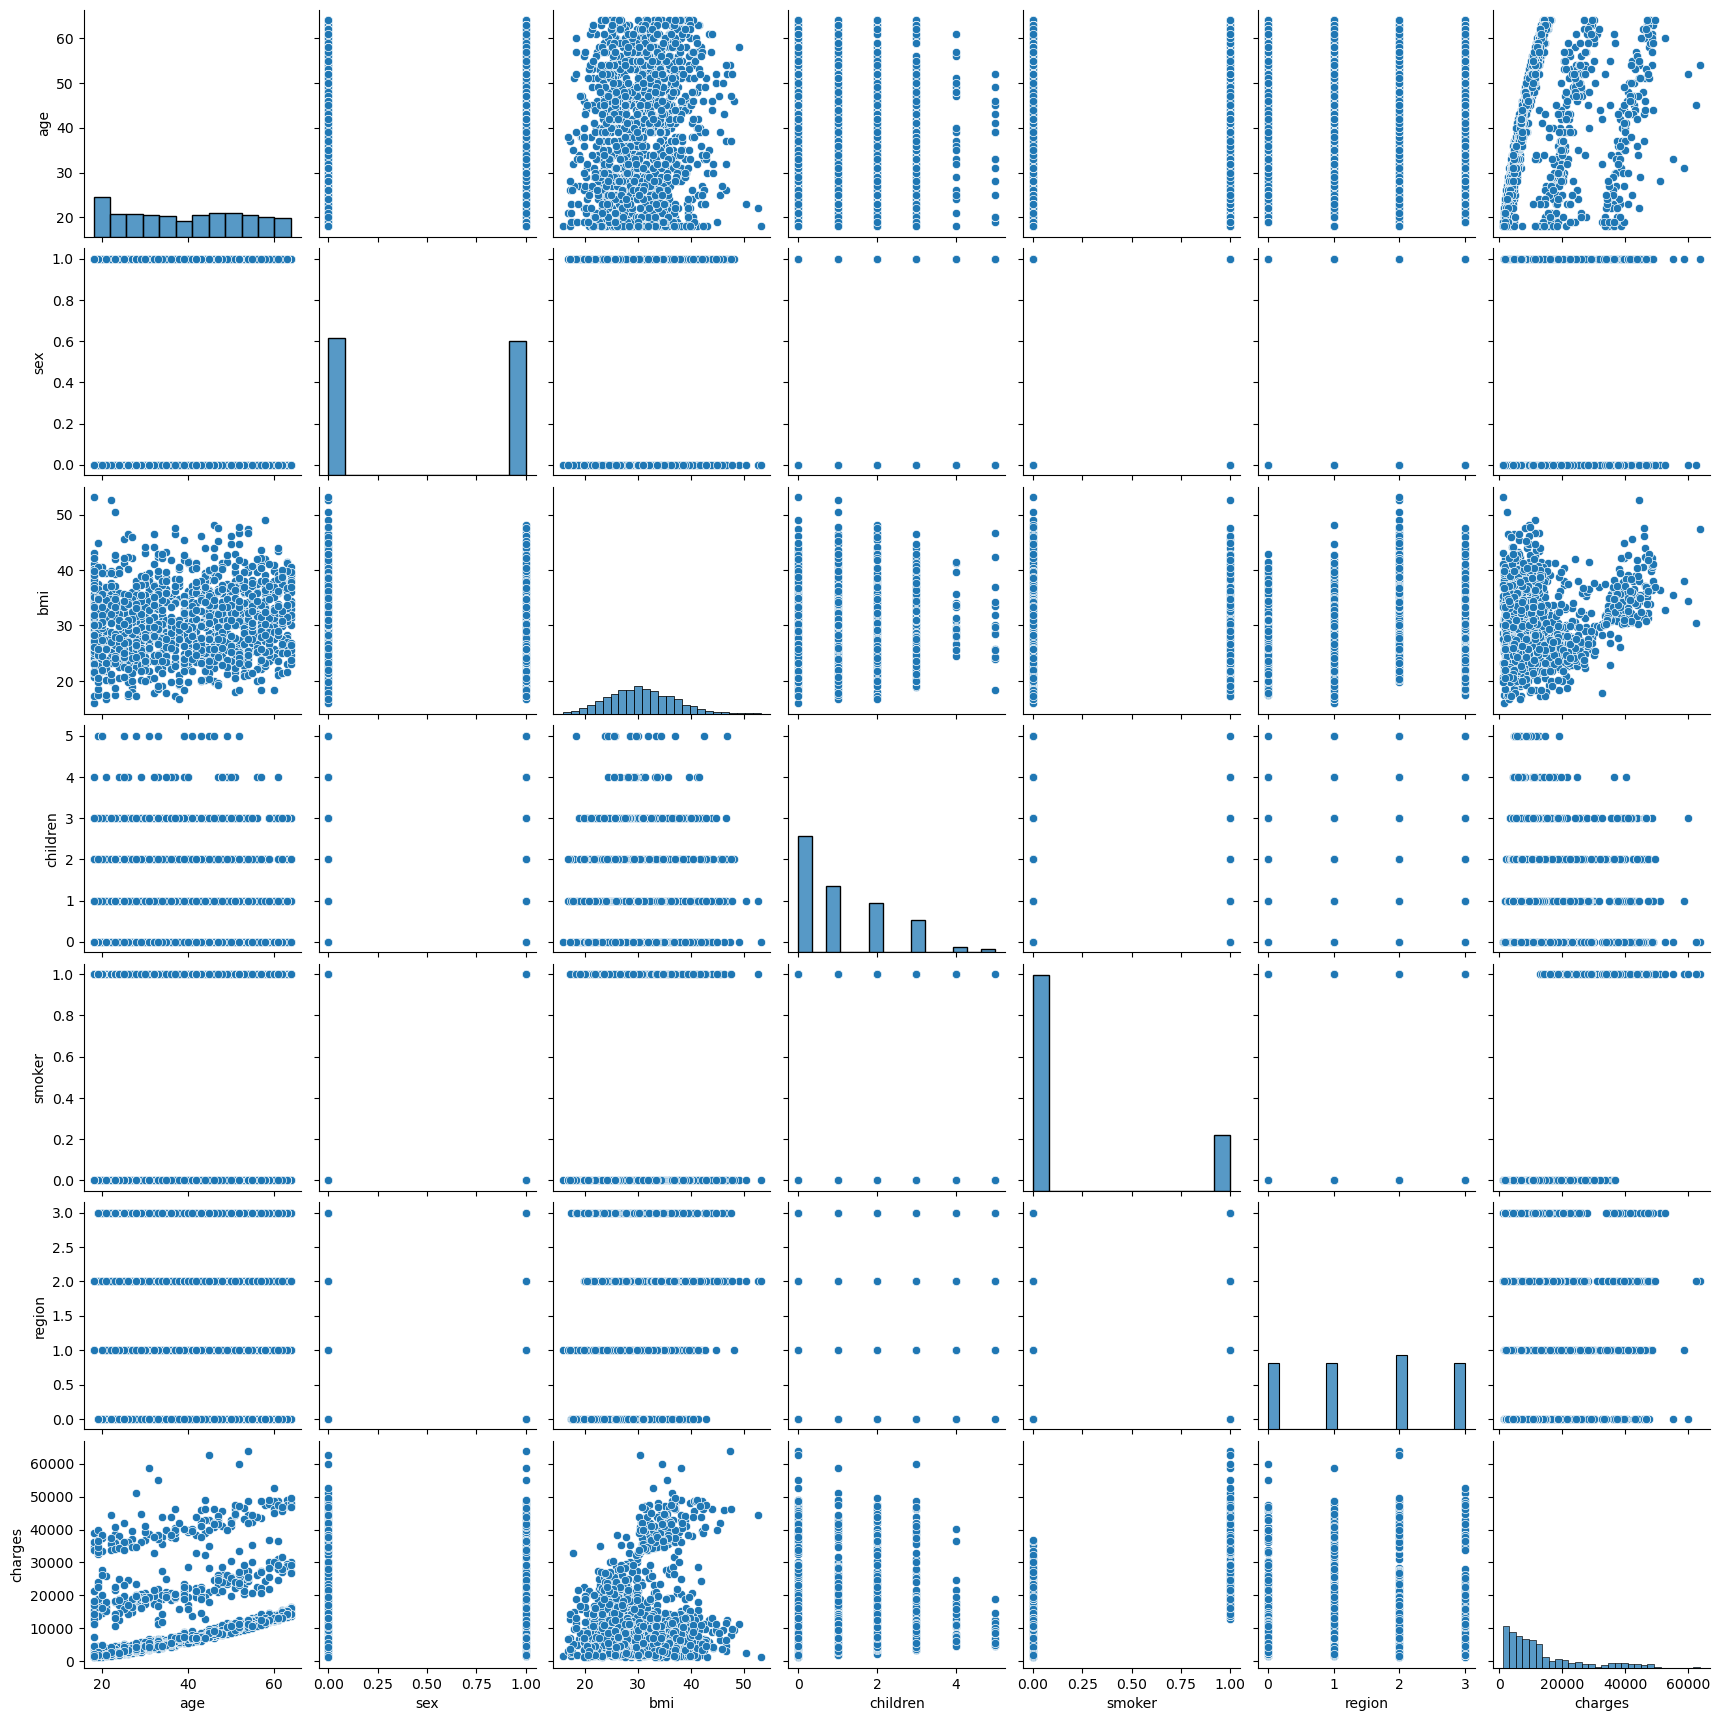

In [22]:
sns.pairplot(data=df_copy)

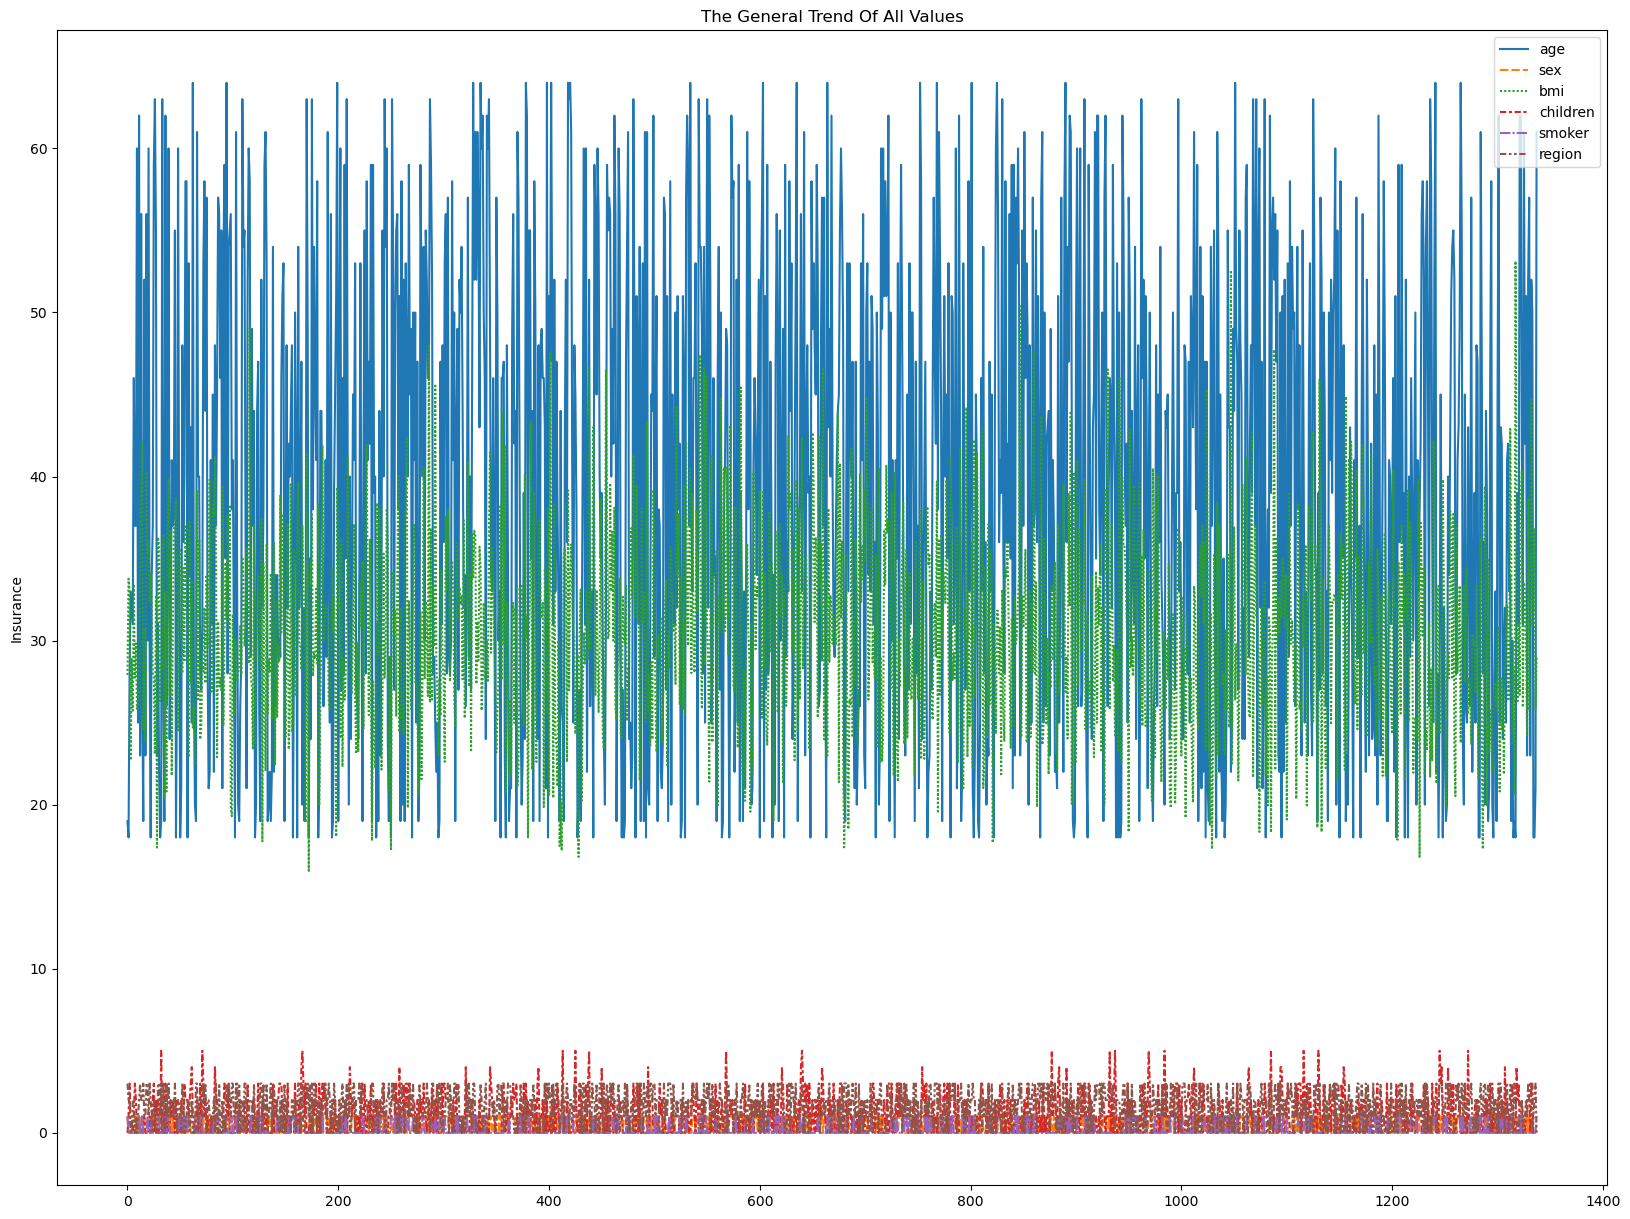

In [23]:
plt.figure(figsize=(20,15))
sns.lineplot(data=df_copy.iloc[:,:-1])
plt.ylabel("Insurance")
plt.title("The General Trend Of All Values")
plt.show()

OUTLIERS

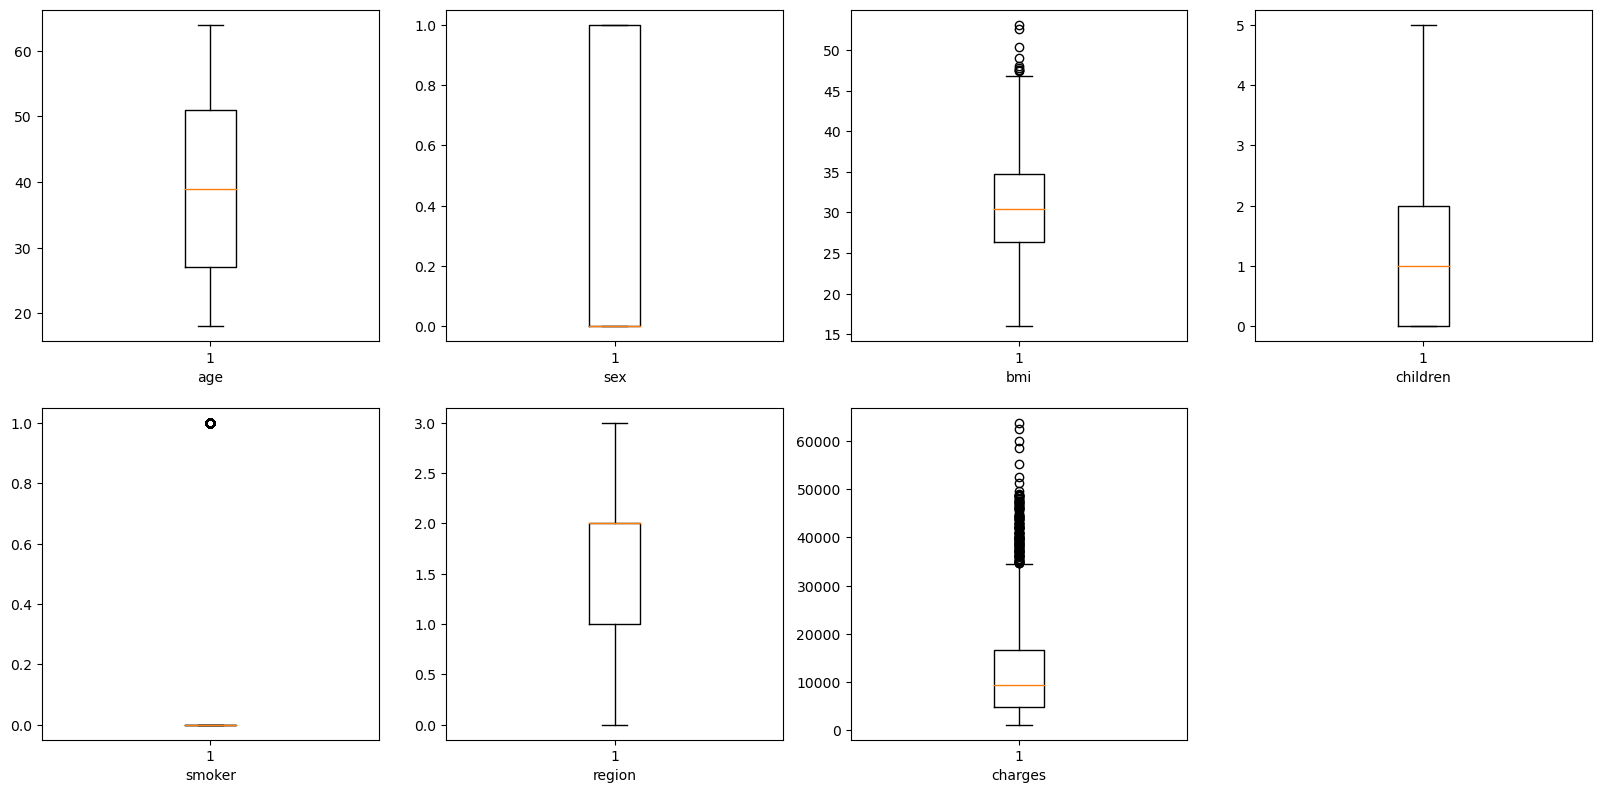

In [24]:
#checking Outliers
plt.figure(figsize=(20,25))
p=1
for i in df_copy:
    if p<=15:
        plt.subplot(5,4,p)
        plt.boxplot(df_copy[i])
        plt.xlabel(i)
    p+=1
plt.show()

In [25]:
from scipy.stats import zscore

In [26]:
features=df_copy[['bmi','charges']]
z=np.abs(zscore(features))
z

,bmi,charges
0,0.453320,0.298584
1,0.509621,0.953689
2,0.383307,0.728675
3,1.305531,0.719843
4,0.292556,0.776802
...,...,...
1333,0.050297,0.220551
1334,0.206139,0.914002
1335,1.014878,0.961596
1336,0.797813,0.930362


REMOVING OUTLIERS

In [27]:
#Now removing outliers
df1=df_copy[(z<3).all(axis=1)]
df1.shape

(1327, 7)

In [28]:
#shape of old and new data frame
print("Old data frame-",df_copy.shape[0])
print("New data farme-",df1.shape[0])

Old data frame- 1338
New data farme- 1327


In [29]:
print("Data loss percentage-",((df_copy.shape[0]-df1.shape[0])/df_copy.shape[0])*100)

Data loss percentage- 0.8221225710014948


In [30]:
#skewness
df1.skew()

age         0.055031
sex         0.013580
bmi         0.203726
children    0.933380
smoker      1.498166
region     -0.033371
charges     1.453405
dtype: float64

In [31]:
#Removing skewness
df1['charges']=np.cbrt(df1['charges'])

In [32]:
#Removing skewness
df1['children']=np.cbrt(df1['children'])

In [33]:
#Removing skewness
df1['smoker']=np.cbrt(df1['smoker'])

In [34]:
df1.skew()

age         0.055031
sex         0.013580
bmi         0.203726
children   -0.101115
smoker      1.498166
region     -0.033371
charges     0.490528
dtype: float64

<AxesSubplot:xlabel='smoker', ylabel='Density'>

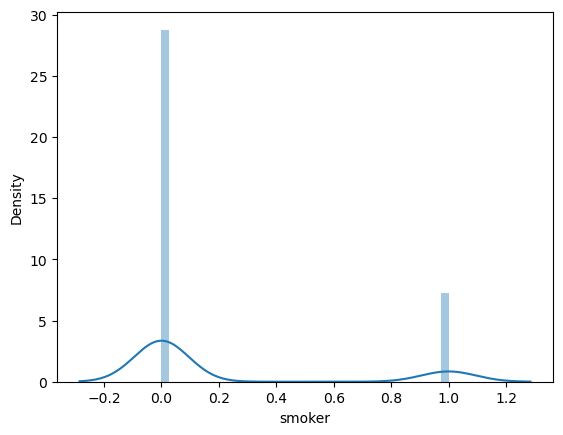

In [35]:
sns.distplot(df1['smoker'])

In [36]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020610,0.117993,0.051882,-0.027158,0.003217,0.457594
sex,0.020610,1.000000,-0.039539,-0.016302,-0.075665,-0.004348,-0.027209
bmi,0.117993,-0.039539,1.000000,0.021980,-0.007974,0.155806,0.151532
children,0.051882,-0.016302,0.021980,1.000000,0.013991,-0.006113,0.134573
smoker,-0.027158,-0.075665,-0.007974,0.013991,1.000000,0.012750,0.725528
region,0.003217,-0.004348,0.155806,-0.006113,0.012750,1.000000,-0.007685
charges,0.457594,-0.027209,0.151532,0.134573,0.725528,-0.007685,1.000000


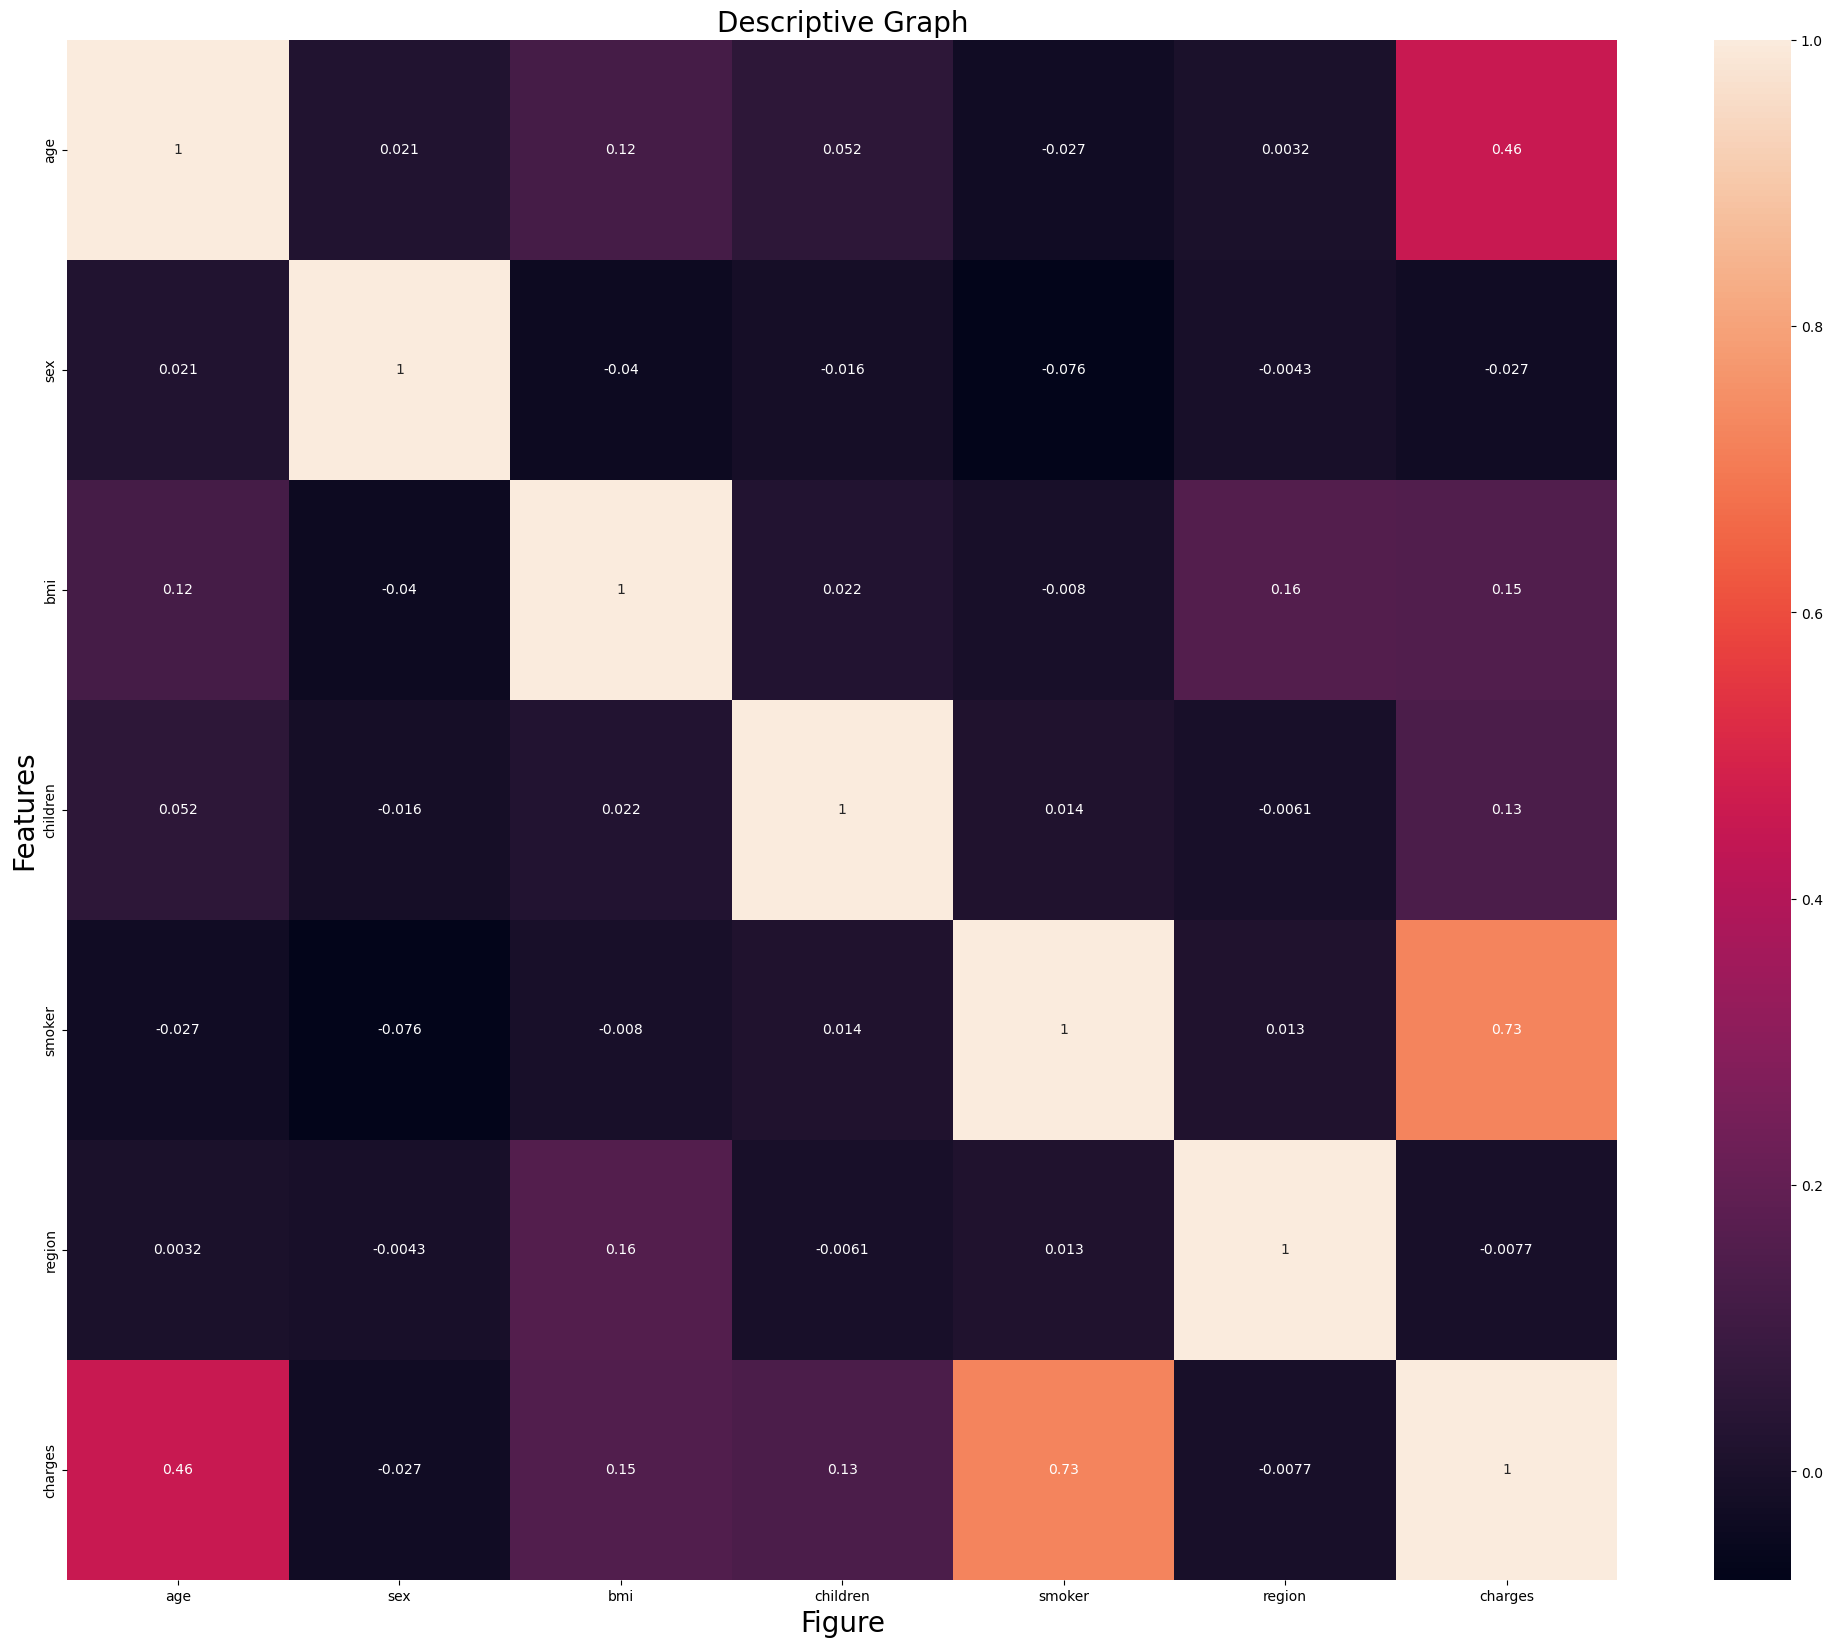

In [37]:
plt.figure(figsize=(25,20))
sns.heatmap(df1.corr(),annot=True)
plt.xlabel("Figure",fontsize=20)
plt.ylabel("Features",fontsize=20)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import norm, stats
import statsmodels.api as sm
import statistics as st
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score
import pickle



In [40]:
from sklearn.metrics import confusion_matrix, classification_report

SCALING OF DATA

In [41]:
data_pre = df1.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.439902,1,-0.446000,0.00000,1.0,3,0.615643
1,-1.511141,0,0.534254,1.00000,0.0,2,-1.487063
2,-0.798759,0,0.405668,1.44225,0.0,2,-0.801581
3,-0.442568,0,-1.313533,0.00000,0.0,0,0.978779
4,-0.513806,0,-0.282346,0.00000,0.0,0,-0.917290


TARINING AND TESTING OF DATA

In [42]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1061, 6)
Size of y_train :  (1061, 1)
Size of X_test :  (266, 6)
Size of Y_test :  (266, 1)


MODELLING OF DATA

In [43]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

Wall time: 40 ms


LinearRegression()

LINEAR REGRESSION

In [44]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.772
R2_score (train) : 0.789
R2_score (test) : 0.724
RMSE : 0.531


SVR

In [52]:
from sklearn.svm import SVR

In [53]:
X_c = df1.drop('charges',axis=1).values
y_c = df1['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [54]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [55]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.843842938461214


In [56]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.844
R2_score (train) : 0.855
R2 score (test) : 0.784
RMSE : 0.465


In [47]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

RIDGE

In [48]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

In [49]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=10, random_state=42))]),
 0.8396826301880965)

In [57]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.840
R2 score (train) : 0.788
R2 score (test) : 0.730
RMSE : 0.524


In [59]:
from sklearn.ensemble import RandomForestRegressor

RANDOM FOREST REGRESSOR

In [60]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

Wall time: 14min 27s


In [61]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8472548004554561,
 RandomForestRegressor(criterion='mse', max_depth=50, min_samples_leaf=10,
                       min_samples_split=7, n_estimators=600))

In [62]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())


RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [63]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.847
R2 score (train) : 0.878
R2 score (test) : 0.781
RMSE : 0.468


In [64]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]


In [65]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.531099,0.788591,0.724097,0.771584
1,Ridge Regression,0.524242,0.788314,0.729828,0.839683
2,Support Vector Regression,0.464989,0.854986,0.783785,0.843843
3,Random Forest Regression,0.468239,0.878276,0.780752,0.847255


In [66]:
import pickle


In [67]:
Pkl_Filename = "rfr_1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [68]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rfr_1_loaded = pickle.load(file)
rfr_1_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)